## Snippet: Mixed Exponential Distributions

The mixed exponential distribution (MED) is used by major US rating bureaus to model severity and compute increased limits factors (ILFs).
This snippet explains how to create a MED in `aggregate`. The distribution is created as an `Aggregate` object with a degenerate frequency 
identically equal to 1 claim. The exponential distribution is surprisingly thick-tailed - in fact, it cab be regarded as the dividing line between 
thin- and thick-tailed distributions. In order to achieve good accuracy, the modeling increases the number of buckets to $2^{18}$ (i.e., `log2=18`) 
and  uses a bucket size `bs=500`.


The table of exponential means and weights appears on slide 24 of Zhu, titled a "Sample of Actual Fitted Distribution".

| **Mean**   |  **Weight** |
|-----------:|------------:|
| 2,763      |  0.824796   |
| 24,548     |  0.159065   |
| 275,654    |  0.014444   |
| 1,917,469  |  0.001624   |
| 10,000,000 |  0.000071   |

Li Zhu, Introduction to Increased Limits Factors, 2011 RPM Basic Ratemaking Workshop,
https://www.casact.org/sites/default/files/presentation/rpm_2011_handouts_ws1-zhu.pdf

In [3]:
sys.path.append('c:\\s\\telos\\python\\aggregate_project')
from aggregate import build
build.logger_level(30)

time: 593 ms (started: 2022-07-15 12:37:42 -04:00)


Parser debugging for UnderwritingParser written to C:\Users\steve\aggregate\parser\parser.out


In [ ]:
# default shows unacceptable error 
medd = build('agg MEDd 1 claim '
            'sev [2.764e3 24.548e3 275.654e3 1.917469e6 10e6] @ expon 1 wts [0.824796 0.159065 0.014444 0.001624, 0.000071] fixed')
print(medd.bs)
medd.report_df

In [ ]:
# with increased log2 and bs=500
med = build('agg MED 1 claim '
            'sev [2.764e3 24.548e3 275.654e3 1.917469e6 10e6] @ expon 1 wts [0.824796 0.159065 0.014444 0.001624, 0.000071] fixed', 
            log2=18, bs=500)
med.report_df

In [ ]:
med.plot()

In [ ]:
med.density_df

In [ ]:
# ILF at 1M, p. 25, reported as 1.52
med.density_df.loc[1000000, 'lev'] / med.density_df.loc[100000, 'lev']

In [ ]:
# graph of all ILFs
base = med.density_df.loc[100000, 'lev']

ax = (med.density_df.lev / base).plot(xlim=[-100000,10.1e6], ylim=[0.9, 1.85])
ax.grid(lw=.25, c='w')
ax.set(xlabel='Limit', ylabel='ILF', title='Pure loss ILFs relative to 100K base');

In [6]:
# to combine with a limits profile (see also snippet on limits profiles)
lim_prof = build('agg LIM_PROF [20 8 4 2] claims [1e6, 2e6 5e6 10e6] xs 0 '
                 'sev [2.764e3 24.548e3 275.654e3 1.917469e6 10e6] @ expon 1 wts [0.824796 0.159065 0.014444 0.001624, 0.000071] fixed', 
                 log2=18, bs=500)
lim_prof

37:59.982|3106|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=1.2567266635025491e+17, message no message ->


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,11.973k,11.970k,-265.055u,6.328,6.330,273.557u,31.665
Freq,34.000,,,0.000,,,
Agg,407.076k,406.968k,-265.055u,1.085,1.086,273.557u,5.431


time: 2.38 s (started: 2022-07-15 12:37:58 -04:00)


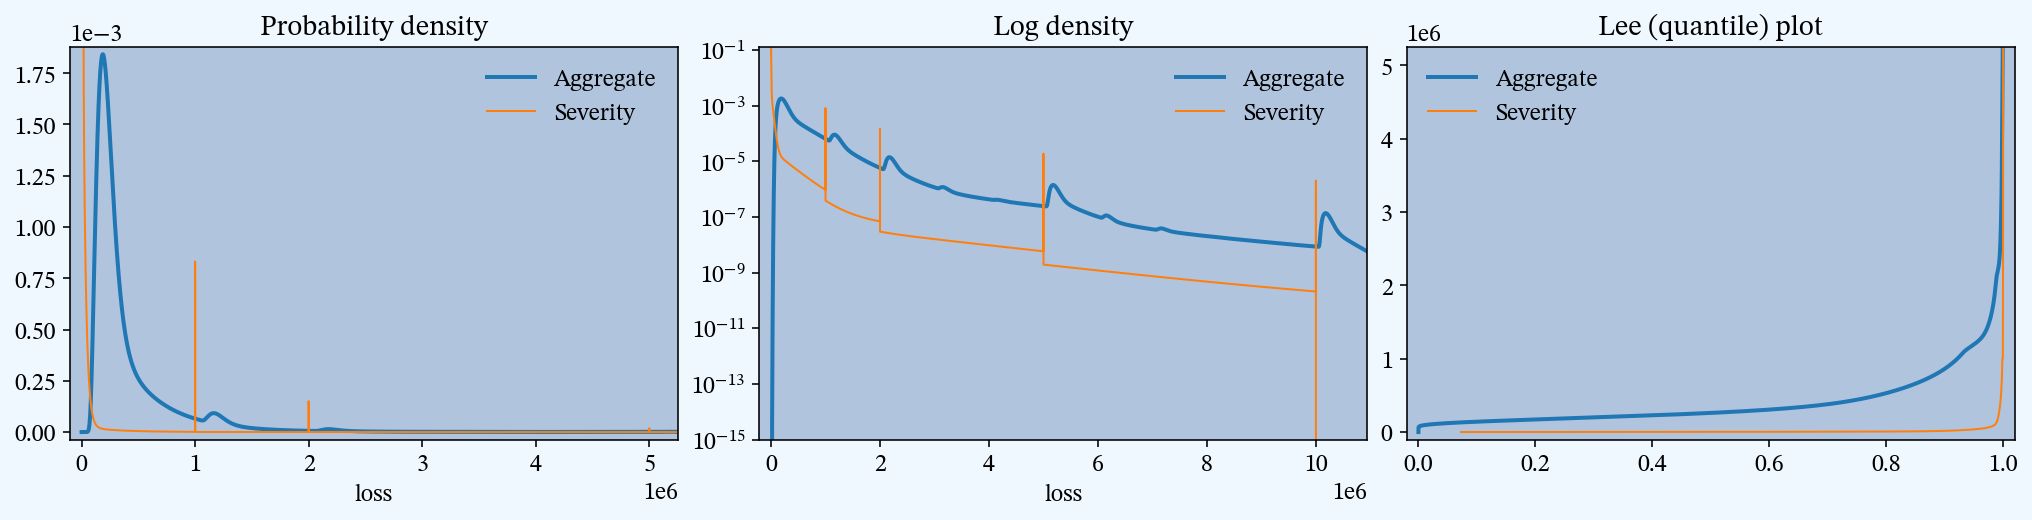

time: 3.23 s (started: 2022-07-15 12:38:09 -04:00)


In [7]:
lim_prof.plot()

In [ ]:
# the report_df shows all 20 components: 4 limits x 5 mixture components
lim_prof.report_df

In [4]:
# to create a built in version that can be stored
med = build('sev COMMAUTO [2.764e3 24.548e3 275.654e3 1.917469e6 10e6] @ expon 1 wts [0.824796 0.159065 0.014444 0.001624, 0.000071]')

37:46.337| 294|WARNING   | aggregate.underwriter, factory|  mixed severity cannot be created, returning spec.


time: 15 ms (started: 2022-07-15 12:37:46 -04:00)


In [5]:
med

{'sev_name': 'expon',
 'sev_a': 1.0,
 'sev_wt': [0.824796, 0.159065, 0.014444, 0.001624, 7.1e-05],
 'sev_scale': array([      2764,      24548,  2.7565e+05,  1.9175e+06,      1e+07]),
 'name': 'COMMAUTO',
 'note': ''}

time: 0 ns (started: 2022-07-15 12:37:48 -04:00)


In [8]:
# to combine with a limits profile (see also snippet on limits profiles)
lim_prof2 = build('agg LIM_PROF2 [20 8 4 2] claims [1e6, 2e6 5e6 10e6] xs 0 '
                 'sev sev.COMMAUTO fixed', 
                 log2=18, bs=500)
lim_prof2.plot()
lim_prof2

38:45.122|3106|WARNING   | aggregate.distr, safe_integrate|  Severity.moms | ansr=1.2567266635025491e+17, message no message ->


,E(X),Est E(X),Err E(X),CV(X),Est CV(X),Err CV(X),Skew(X)
X,,,,,,,
Sev,11.973k,11.970k,-265.055u,6.328,6.330,273.557u,31.665
Freq,34.000,,,0.000,,,
Agg,407.076k,406.968k,-265.055u,1.085,1.086,273.557u,5.431


time: 2.48 s (started: 2022-07-15 12:38:44 -04:00)


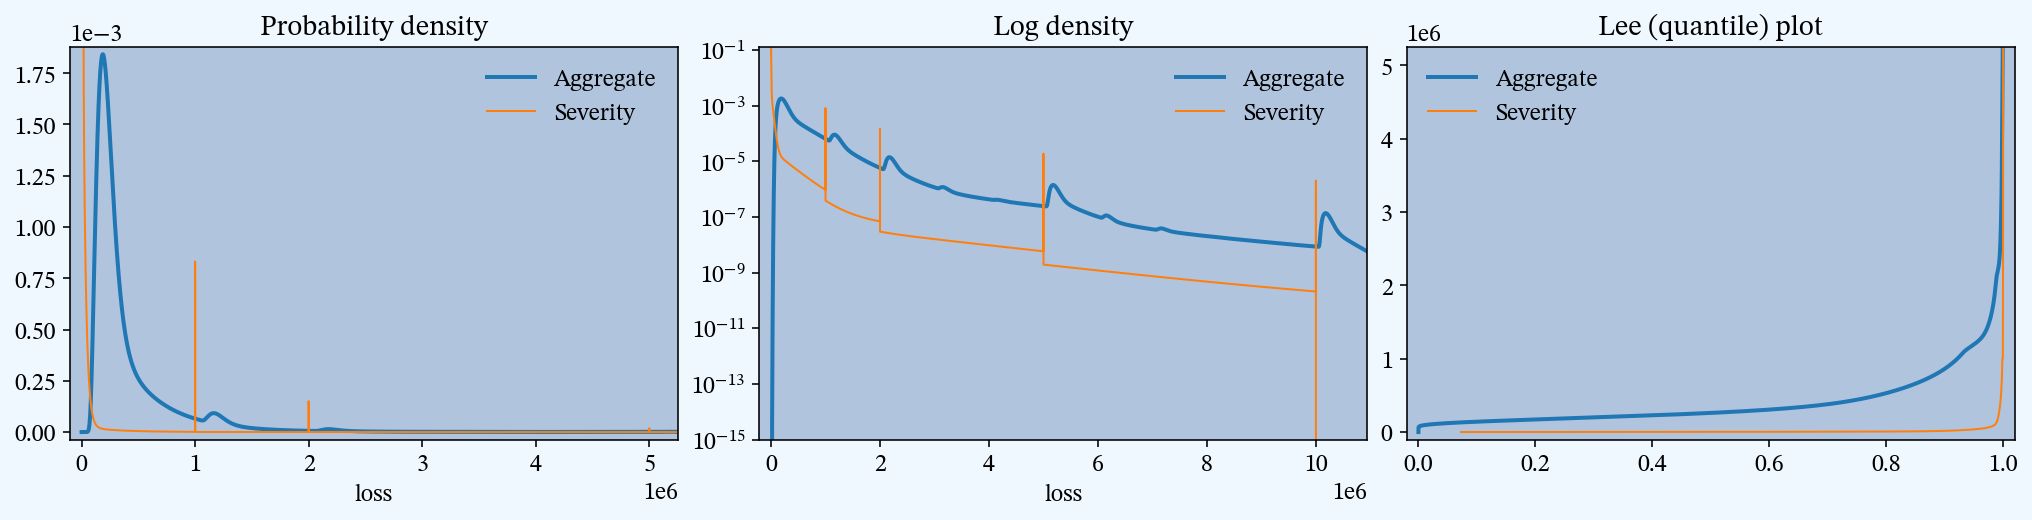

time: 2.84 s (started: 2022-07-15 12:39:06 -04:00)


In [9]:
lim_prof2.plot()

\
\
Created: July 6, 2022